<a href="https://colab.research.google.com/github/Subham15-11/Stock_-price-prediction/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1sIotM7dcLgQuRXv2-PoGcRXGnGwIJQSl")

In [ ]:
df.shape

(2397, 20)

In [ ]:
df.head()

,date,open,high,low,close,adj close,volume,daily_return,close_lag_1,close_lag_3,close_lag_7,ma_5,ma_10,ma_20,volatility_10,rsi,macd,macd_signal,price_range,volume_change
0,2010-07-27,20.910000,21.180000,20.260000,20.549999,20.549999,619700.0,-0.019093,20.950001,21.000000,20.639999,20.802,20.659,19.8715,0.046996,72.770838,-0.399783,-0.735070,0.920000,-0.328020
1,2010-07-28,20.549999,20.900000,20.510000,20.719999,20.719999,467200.0,0.008273,20.549999,21.290001,21.910000,20.902,20.747,19.7130,0.037634,68.232650,-0.350607,-0.658177,0.390000,-0.246087
2,2010-07-29,20.770000,20.879999,20.000000,20.350000,20.350000,616000.0,-0.017857,20.719999,20.950001,20.299999,20.772,20.793,19.5390,0.038328,65.945936,-0.337599,-0.594062,0.879999,0.318493
3,2010-07-30,20.200001,20.440001,19.549999,19.940001,19.940001,426900.0,-0.020147,20.350000,20.549999,20.219999,20.502,20.723,19.4380,0.036837,65.520949,-0.356267,-0.546503,0.890002,-0.306981
4,2010-08-02,20.500000,20.969999,20.330000,20.920000,20.920000,718100.0,0.049147,19.940001,20.719999,21.000000,20.496,20.624,19.5240,0.034572,65.108696,-0.288656,-0.494933,0.639999,0.682127


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2397 non-null   object 
 1   open           2397 non-null   float64
 2   high           2397 non-null   float64
 3   low            2397 non-null   float64
 4   close          2397 non-null   float64
 5   adj close      2397 non-null   float64
 6   volume         2397 non-null   float64
 7   daily_return   2397 non-null   float64
 8   close_lag_1    2397 non-null   float64
 9   close_lag_3    2397 non-null   float64
 10  close_lag_7    2397 non-null   float64
 11  ma_5           2397 non-null   float64
 12  ma_10          2397 non-null   float64
 13  ma_20          2397 non-null   float64
 14  volatility_10  2397 non-null   float64
 15  rsi            2397 non-null   float64
 16  macd           2397 non-null   float64
 17  macd_signal    2397 non-null   float64
 18  price_ra

In [ ]:
features = [
    "open", "high", "low", "close", "volume",
    "ma_5", "ma_10", "ma_20",
    "rsi", "macd", "macd_signal",
    "volatility_10", "price_range"
]

target = "close"

In [ ]:
#Train–Test Split (Time Series Safe)
train_size = int(len(df) * 0.8)

train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

In [ ]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit ONLY on training data
X_train_scaled = scaler_x.fit_transform(train_df[features])
X_test_scaled = scaler_x.transform(test_df[features])

y_train_scaled = scaler_y.fit_transform(train_df[[target]])
y_test_scaled = scaler_y.transform(test_df[[target]])

In [ ]:
# Create Sequences for LSTM / RNN
def create_sequences(X, y, time_steps=60):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
# Final LSTM Data
TIME_STEPS = 60

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled, TIME_STEPS)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled, TIME_STEPS)

In [ ]:
X_train.shape # (samples, timesteps, features)
# y_train.shape

(1857, 60, 13)

# RNN Model Code

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

In [ ]:
import tensorflow as tf
import keras

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.19.0
Keras version: 3.10.0


In [ ]:
model_rnn = Sequential()

In [ ]:
model_rnn.add(SimpleRNN(
    units=50,
    activation="tanh",
    return_sequences=False,
    input_shape=(X_train.shape[1], X_train.shape[2])
))

model_rnn.add(Dropout(0.2))

model_rnn.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_rnn.compile(
    optimizer="adam",
    loss="mean_squared_error"
)

In [ ]:
model_rnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 50)             │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,251 (12.70 KB)

 Trainable params: 3,251 (12.70 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_rnn = model_rnn.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2910 - val_loss: 0.0282
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0544 - val_loss: 0.0151
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0311 - val_loss: 0.0125
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0254 - val_loss: 0.0090
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0174 - val_loss: 0.0109
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0128 - val_loss: 0.0084
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0137 - val_loss: 0.0081
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0110 - val_loss: 0.0049
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0085 - val_loss: 0.0051
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0065 - val_loss: 0.0057
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0

In [ ]:
# Predict using trained RNN model
y_pred_rnn_scaled = model_rnn.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
# Inverse transform predictions
y_pred_rnn_scaled_2d = y_pred_rnn_scaled
y_pred_rnn = scaler_y.inverse_transform(y_pred_rnn_scaled_2d)

# Inverse transform actual values
y_actual = scaler_y.inverse_transform(y_test)

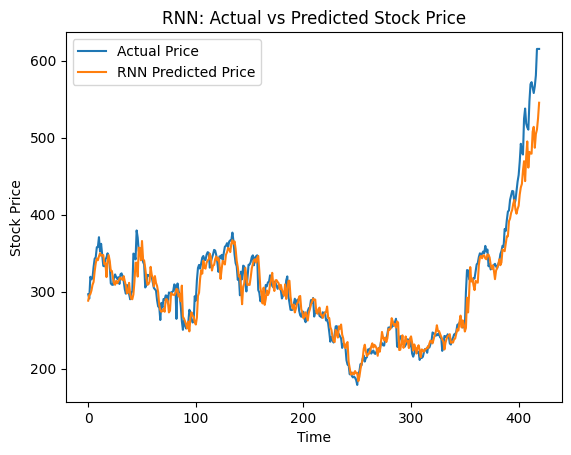

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(y_actual, label="Actual Price")
plt.plot(y_pred_rnn, label="RNN Predicted Price")
plt.title("RNN: Actual vs Predicted Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_actual, y_pred_rnn)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred_rnn))

print("RNN MAE:", mae)
print("RNN RMSE:", rmse)

RNN MAE: 13.380600832484653
RNN RMSE: 20.31421070565605


## LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model_lstm = Sequential()

In [ ]:
model_lstm.add(LSTM(
    units=50,
    return_sequences=True,
    input_shape=(X_train.shape[1], X_train.shape[2])
))

model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(
    units=50,
    return_sequences=False
))

model_lstm.add(Dropout(0.2))

model_lstm.add(Dense(1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_lstm.compile(
    optimizer="adam",
    loss="mean_squared_error"
)

In [ ]:
model_lstm.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 60, 50)         │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,051 (129.11 KB)

 Trainable params: 33,051 (129.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0259 - val_loss: 0.0137
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0042 - val_loss: 0.0073
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0039 - val_loss: 0.0167
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0036 - val_loss: 0.0313
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0070 - val_loss: 0.0082
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0027 - val_loss: 0.0062
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0027 - val_loss: 0.0076
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0024 - val_loss: 0.0070
Epoch 9/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0026 - val_loss: 0.0101
Epoch 10/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0027 - val_loss: 0.0099
Epoch 11/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0023 - val_loss: 0.0064
Epoch 12/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0

In [ ]:
# Predict using trained LSTM model
y_pred_lstm_scaled = model_lstm.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [ ]:
# Inverse transform predictions
y_pred_lstm_scaled_2d = y_pred_lstm_scaled
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled_2d)

# Inverse transform actual values
y_actual_lstm = scaler_y.inverse_transform(y_test)

In [ ]:
mae = mean_absolute_error(y_actual, y_pred_lstm)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred_lstm))
print("LSTM mae",mae)
print("LSTM rmse",rmse)

LSTM mae 16.07141922058687
LSTM rmse 25.131872404392567


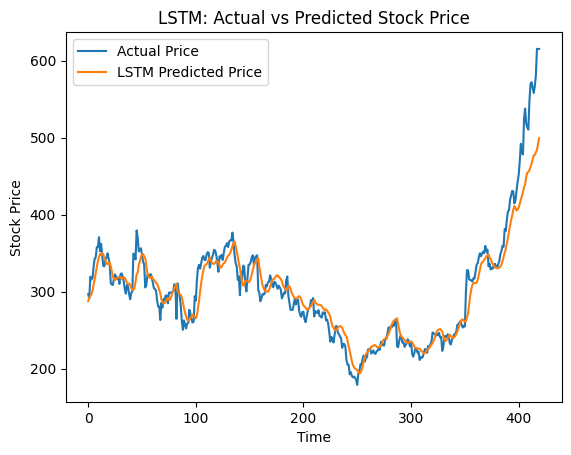

In [ ]:
plt.figure()
plt.plot(y_actual, label="Actual Price")
plt.plot(y_pred_lstm, label="LSTM Predicted Price")
plt.title("LSTM: Actual vs Predicted Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()